# Part 1: PyTorch MLP (30 points)
Student: THA Sreyny
SID: 12113053

## Task 1: Implement the MLP architecture and the training procedure by completing the files pytorch_mlp.py and pytorch_train mlp.py.

pytorch_mlp.py

pytorch_train mlp.py

## Task 2: Training MLP pytorch and MLP numpy on the same datasets

## 2.1 Generate data using make_moons

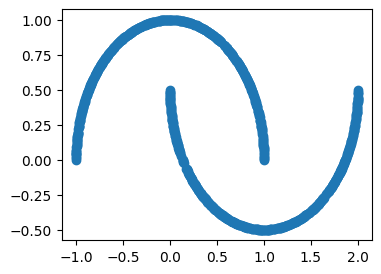

In [1]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
def generate_data():
    x, y = make_moons(n_samples=1000, random_state=42)
    one_hot_encoded = OneHotEncoder(sparse_output=False)
    y_2d = y.reshape(-1, 1)
    y_onehot = one_hot_encoded.fit_transform(y_2d)

    x_train, x_test, y_train_onehot, y_test_onehot = train_test_split(x, y_onehot, test_size=0.2, random_state=42)
    return x_train, x_test, y_train_onehot, y_test_onehot

x_train, x_test, y_train, y_test = generate_data()
plt.figure(figsize=(4,3))
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()

## 2.1 shuffle data and add some noise

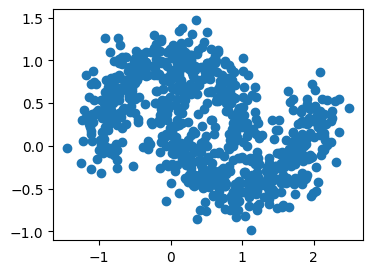

In [2]:
def generate_data():
    x, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)
    one_hot_encoded = OneHotEncoder(sparse_output=False)
    y_2d = y.reshape(-1, 1)
    y_onehot = one_hot_encoded.fit_transform(y_2d)

    x_train, x_test, y_train_onehot, y_test_onehot = train_test_split(x, y_onehot, test_size=0.2, random_state=42)
    return x_train, x_test, y_train_onehot, y_test_onehot

x_train, x_test, y_train, y_test = generate_data()

plt.figure(figsize=(4,3))
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()

### 2.2 Training and test dataset using MLP numpy

In [3]:
from train_mlp_numpy import train
from mlp_numpy import MLPN
# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '128'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1000  # adjust if you use batch or not
EVAL_FREQ_DEFAULT = 1
DEFAULT_BATCH_SIZE = 1000
mlpn = MLPN(x_train.shape[1], list(map(int, DNN_HIDDEN_UNITS_DEFAULT.split(','))), y_train.shape[1])
training_loss, training_accuracy,testing_loss, testing_accuracy =train(mlpn,x_train, x_test, y_train, y_test,DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, DEFAULT_BATCH_SIZE)

Step: 1, Train Loss: 7.63, Train Accuracy: 0.64, Test Loss: 8.71, Test Accuracy: 0.60
Step: 2, Train Loss: 10.93, Train Accuracy: 0.51, Test Loss: 11.09, Test Accuracy: 0.52
Step: 3, Train Loss: 10.42, Train Accuracy: 0.50, Test Loss: 11.13, Test Accuracy: 0.50
Step: 4, Train Loss: 2.52, Train Accuracy: 0.66, Test Loss: 2.11, Test Accuracy: 0.69
Step: 5, Train Loss: 1.35, Train Accuracy: 0.72, Test Loss: 1.38, Test Accuracy: 0.69
Step: 6, Train Loss: 0.55, Train Accuracy: 0.73, Test Loss: 0.45, Test Accuracy: 0.72
Step: 7, Train Loss: 0.76, Train Accuracy: 0.75, Test Loss: 0.76, Test Accuracy: 0.72
Step: 8, Train Loss: 0.96, Train Accuracy: 0.54, Test Loss: 0.89, Test Accuracy: 0.53
Step: 9, Train Loss: 1.56, Train Accuracy: 0.71, Test Loss: 1.78, Test Accuracy: 0.68
Step: 10, Train Loss: 0.57, Train Accuracy: 0.78, Test Loss: 0.51, Test Accuracy: 0.81
Step: 11, Train Loss: 0.68, Train Accuracy: 0.76, Test Loss: 0.77, Test Accuracy: 0.72
Step: 12, Train Loss: 0.58, Train Accuracy: 0.71

### 2.3 Training and test dataset using MLP pytorch


In [4]:
from pytorch_mlp import MLP 
from pytorch_train_mlp import train

In [5]:
input_size = x_train.shape[1]
hidden_sizes = [128]
output_size = y_train.shape[1]

mlp_torch = MLP(input_size, hidden_sizes, output_size)

train_loss, train_accu, test_loss, test_accu = train(mlp_torch, x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.001, batch_size=1000)

Epoch 1, Loss: 0.6291, Accuracy: 0.6275, Val Loss: 0.6189, Val Accuracy: 0.7200
Epoch 2, Loss: 0.6172, Accuracy: 0.7288, Val Loss: 0.6076, Val Accuracy: 0.7800
Epoch 3, Loss: 0.6056, Accuracy: 0.7913, Val Loss: 0.5967, Val Accuracy: 0.8300
Epoch 4, Loss: 0.5944, Accuracy: 0.8387, Val Loss: 0.5861, Val Accuracy: 0.8450
Epoch 5, Loss: 0.5834, Accuracy: 0.8675, Val Loss: 0.5758, Val Accuracy: 0.8550
Epoch 6, Loss: 0.5728, Accuracy: 0.8700, Val Loss: 0.5657, Val Accuracy: 0.8550
Epoch 7, Loss: 0.5624, Accuracy: 0.8738, Val Loss: 0.5560, Val Accuracy: 0.8600
Epoch 8, Loss: 0.5523, Accuracy: 0.8750, Val Loss: 0.5466, Val Accuracy: 0.8550
Epoch 9, Loss: 0.5425, Accuracy: 0.8775, Val Loss: 0.5374, Val Accuracy: 0.8500
Epoch 10, Loss: 0.5330, Accuracy: 0.8725, Val Loss: 0.5285, Val Accuracy: 0.8450
Epoch 11, Loss: 0.5237, Accuracy: 0.8662, Val Loss: 0.5200, Val Accuracy: 0.8400
Epoch 12, Loss: 0.5148, Accuracy: 0.8612, Val Loss: 0.5116, Val Accuracy: 0.8400
Epoch 13, Loss: 0.5061, Accuracy: 0.8

## 2.4 Plot the result of MLP numpy

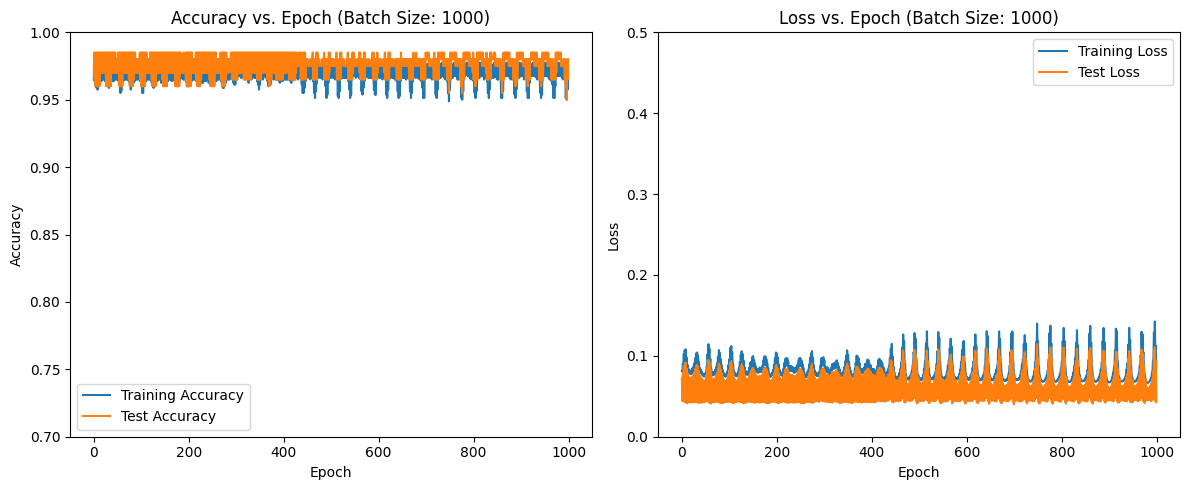

In [23]:
import numpy as np
training_accu = np.array(training_accuracy)
testing_accu  = np.array(testing_accuracy )
training_losses = np.array(training_loss)
testing_losses = np.array(testing_loss)

# Plot the accuracy vs. epoch
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy vs. epoch
axs[0].plot(training_accu, label='Training Accuracy')
axs[0].plot(testing_accu, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(DEFAULT_BATCH_SIZE) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0.7,1.0)
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_losses, label='Training Loss')
axs[1].plot(testing_losses, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(DEFAULT_BATCH_SIZE) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_ylim(0,0.5)
axs[1].legend()

plt.tight_layout()
plt.show()

## 2.5 Plot the result of MLP Pytorch

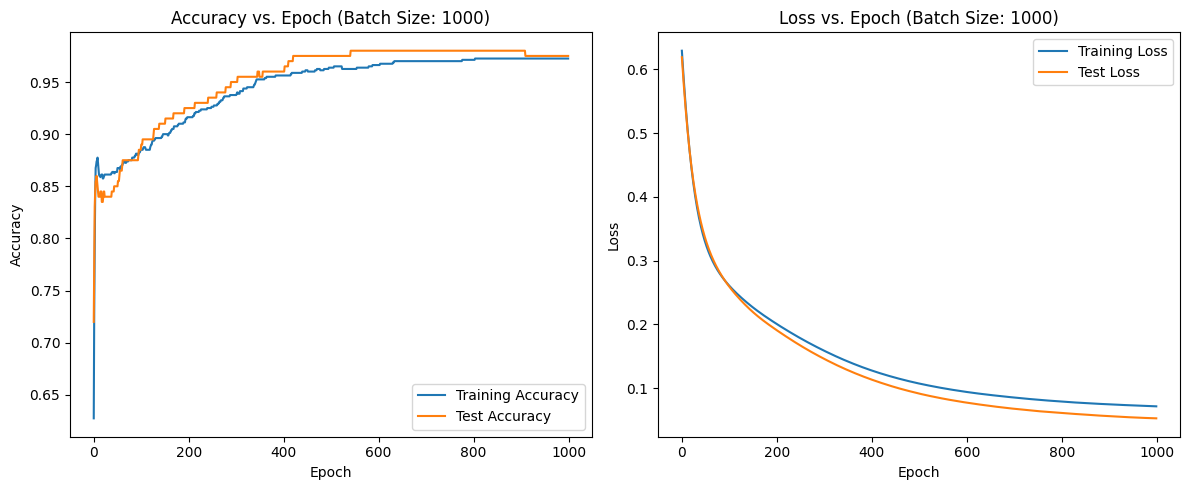

In [15]:
import numpy as np
training_accu = np.array(train_accu)
testing_accu  = np.array(test_accu )
training_losses = np.array(train_loss)
testing_losses = np.array(test_loss)

# Plot the accuracy vs. epoch
fig1, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy vs. epoch
axs[0].plot(training_accu, label='Training Accuracy')
axs[0].plot(testing_accu, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(DEFAULT_BATCH_SIZE) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_losses, label='Training Loss')
axs[1].plot(testing_losses, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(DEFAULT_BATCH_SIZE) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

## 2.6 Boundary Decision by MLP Pytorch

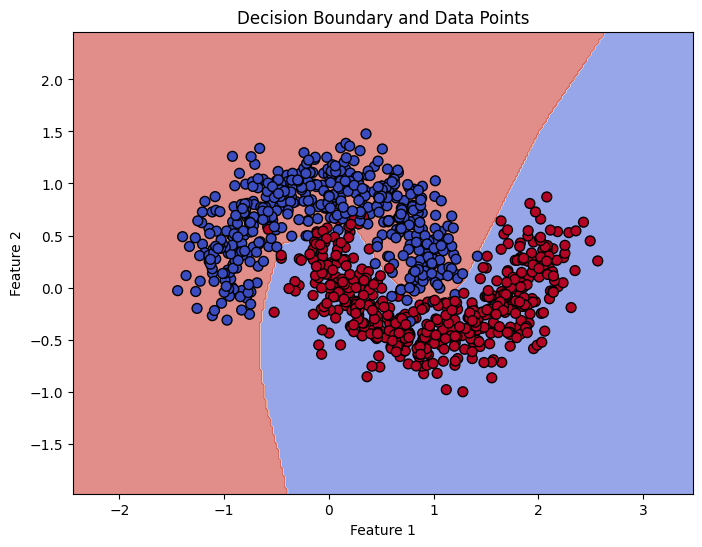

In [8]:
from pytorch_train_mlp import plot_decision_boundary_p
plot_decision_boundary_p(mlp_torch, x_train, y_train, x_test, y_test)

# 3: stochastic gradient descent

## 3.1 MLP with numpy batch_size = 10000

In [9]:
from train_mlp_numpy import train
training_loss_n, training_accuracy_n,testing_loss_n, testing_accuracy_n = train(mlpn,x_train, x_test, y_train, y_test,DNN_HIDDEN_UNITS_DEFAULT, LEARNING_RATE_DEFAULT, MAX_EPOCHS_DEFAULT, EVAL_FREQ_DEFAULT, 10000)

Step: 1, Train Loss: 0.08, Train Accuracy: 0.96, Test Loss: 0.07, Test Accuracy: 0.97
Step: 2, Train Loss: 0.08, Train Accuracy: 0.97, Test Loss: 0.04, Test Accuracy: 0.98
Step: 3, Train Loss: 0.09, Train Accuracy: 0.96, Test Loss: 0.08, Test Accuracy: 0.96
Step: 4, Train Loss: 0.09, Train Accuracy: 0.97, Test Loss: 0.04, Test Accuracy: 0.98
Step: 5, Train Loss: 0.10, Train Accuracy: 0.96, Test Loss: 0.09, Test Accuracy: 0.96
Step: 6, Train Loss: 0.09, Train Accuracy: 0.97, Test Loss: 0.04, Test Accuracy: 0.98
Step: 7, Train Loss: 0.11, Train Accuracy: 0.96, Test Loss: 0.09, Test Accuracy: 0.96
Step: 8, Train Loss: 0.09, Train Accuracy: 0.97, Test Loss: 0.04, Test Accuracy: 0.98
Step: 9, Train Loss: 0.11, Train Accuracy: 0.96, Test Loss: 0.09, Test Accuracy: 0.96
Step: 10, Train Loss: 0.09, Train Accuracy: 0.97, Test Loss: 0.04, Test Accuracy: 0.98
Step: 11, Train Loss: 0.10, Train Accuracy: 0.96, Test Loss: 0.08, Test Accuracy: 0.96
Step: 12, Train Loss: 0.09, Train Accuracy: 0.97, Te

## 3.2 MLP with Pytorch batch_size = 10000

In [10]:
from pytorch_train_mlp import train
train_loss_p, train_accu_p,test_loss_p, test_accu_p = train(mlp_torch, x_train, y_train, x_test, y_test, epochs=1000, learning_rate=0.001, batch_size=10000)

Epoch 1, Loss: 0.0714, Accuracy: 0.9725, Val Loss: 0.0523, Val Accuracy: 0.9750
Epoch 2, Loss: 0.0713, Accuracy: 0.9738, Val Loss: 0.0525, Val Accuracy: 0.9750
Epoch 3, Loss: 0.0712, Accuracy: 0.9725, Val Loss: 0.0522, Val Accuracy: 0.9750
Epoch 4, Loss: 0.0710, Accuracy: 0.9738, Val Loss: 0.0520, Val Accuracy: 0.9750
Epoch 5, Loss: 0.0709, Accuracy: 0.9738, Val Loss: 0.0520, Val Accuracy: 0.9750
Epoch 6, Loss: 0.0708, Accuracy: 0.9738, Val Loss: 0.0520, Val Accuracy: 0.9750
Epoch 7, Loss: 0.0707, Accuracy: 0.9738, Val Loss: 0.0519, Val Accuracy: 0.9750
Epoch 8, Loss: 0.0706, Accuracy: 0.9738, Val Loss: 0.0517, Val Accuracy: 0.9750
Epoch 9, Loss: 0.0705, Accuracy: 0.9738, Val Loss: 0.0516, Val Accuracy: 0.9750
Epoch 10, Loss: 0.0704, Accuracy: 0.9738, Val Loss: 0.0514, Val Accuracy: 0.9750
Epoch 11, Loss: 0.0703, Accuracy: 0.9738, Val Loss: 0.0514, Val Accuracy: 0.9750
Epoch 12, Loss: 0.0702, Accuracy: 0.9738, Val Loss: 0.0513, Val Accuracy: 0.9750
Epoch 13, Loss: 0.0701, Accuracy: 0.9

## 3.3 Plot for MLP with numpy batch_size = 10000

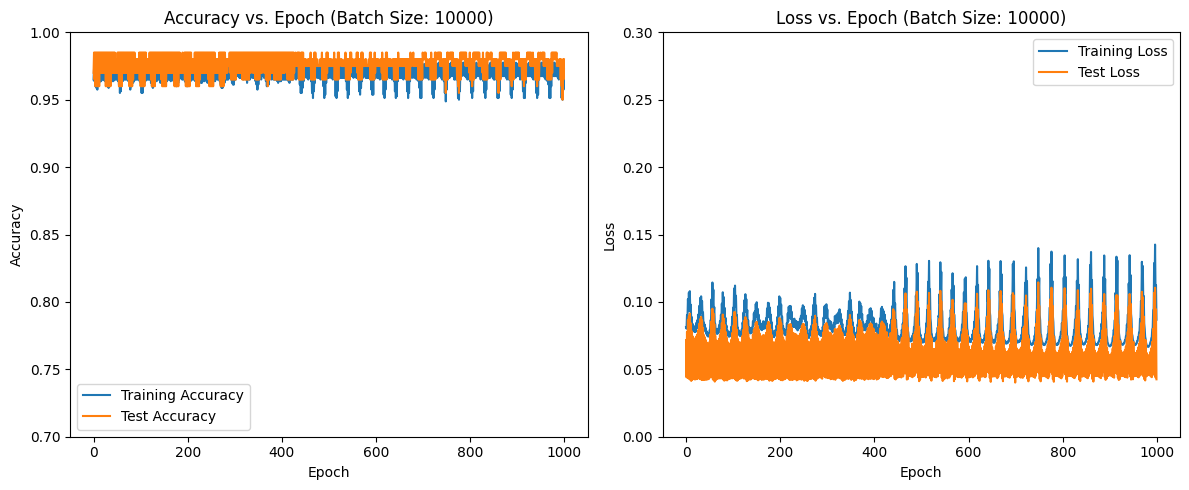

In [24]:
training_accuracy = np.array(training_accuracy_n)
testing_accuracy  = np.array(testing_accuracy_n )
training_loss = np.array(training_loss_n)
testing_loss = np.array(testing_loss_n)
# Plot the accuracy vs. epoch
fig2, axs = plt.subplots(1, 2, figsize=(12, 5))
# Plot accuracy vs. epoch
axs[0].plot(training_accuracy, label='Training Accuracy')
axs[0].plot(testing_accuracy, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(10000) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0.7, 1)
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_loss, label='Training Loss')
axs[1].plot(testing_loss, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(10000) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_ylim(0,0.3)
axs[1].legend()

plt.tight_layout()
plt.show()

## 3.4 Plot for MLP with pytorch batch_size = 10000

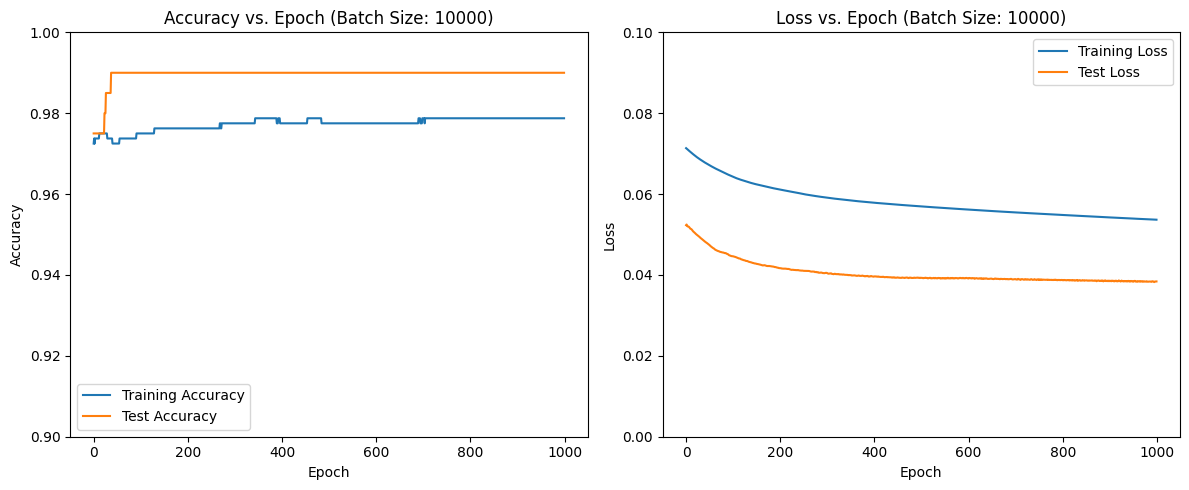

In [14]:
training_accuracy_p = np.array(train_accu_p)
testing_accuracy_p  = np.array(test_accu_p )
training_loss_p = np.array(train_loss_p)
testing_loss_p = np.array(test_loss_p)
# Plot the accuracy vs. epoch
fig3, axs = plt.subplots(1, 2, figsize=(12, 5))
# Plot accuracy vs. epoch
axs[0].plot(training_accuracy_p, label='Training Accuracy')
axs[0].plot(testing_accuracy_p, label='Test Accuracy')
axs[0].set_title('Accuracy vs. Epoch (Batch Size: ' + str(10000) + ')')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0.9,1)
axs[0].legend()

# Plot loss vs. epoch
axs[1].plot(training_loss_p, label='Training Loss')
axs[1].plot(testing_loss_p, label='Test Loss')
axs[1].set_title('Loss vs. Epoch (Batch Size: ' + str(10000) + ')')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_ylim(0,0.1)
axs[1].legend()

plt.tight_layout()
plt.show()